`import library`

In [128]:
import os
import numpy as np
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras import optimizers, metrics, models
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical

In [129]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


`Read Data`

In [130]:
# jalur data
dir = '/content/drive/MyDrive/project/PORTODATA/multiclass_image_project/natural_images/'

os.listdir(dir)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [131]:
# Fitur dan Label
ft = []
lb = []
labels = {}

# Ekstrak Label String and Index
for i, k in enumerate(os.listdir(dir)):
    labels[k] = i
    
# Tambahkan Fitur and Labels
for i in os.listdir(dir):
    subdir = os.path.join(dir, i)
    for j in tqdm(os.listdir(subdir)):
        im = cv2.imread(os.path.join(subdir, j), 0)
        im = cv2.resize(im, (70, 70))

        ft.append(im)
        lb.append(labels[i])

100%|██████████| 300/300 [00:01<00:00, 246.08it/s]


In [132]:
# Convert ke numpy arrays
ft = np.array(ft)
lb = np.array(lb).reshape(2386, 1)

ft.shape, lb.shape

((2386, 70, 70), (2386, 1))

In [133]:
# Reshaping Fitur dan Dimensi Data
X = ft.reshape(-1, 70, 70, 1)
X.shape

(2386, 70, 70, 1)

In [134]:
# One Hot Encoding label values
Y = to_categorical(lb)
Y.shape

(2386, 8)

In [135]:
# Normalizing feautures values
X = X/255.0

`membagi data dengan rasio train:70% dan valid:30%`

In [136]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1789, 70, 70, 1), (597, 70, 70, 1), (1789, 8), (597, 8))

In [137]:
# Shape of one element of x_train
x_train.shape[1:]

(70, 70, 1)

`Model Definition`

In [138]:
# Initializing the model instance
model = models.Sequential()

# Adding layers to model instance
model.add(Conv2D(32,(3,3) , padding='same' , input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(1024,(3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(8,activation='softmax')) # 8 neurons for 8 classes

In [139]:
# Checking model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 70, 70, 32)        320       
                                                                 
 activation_34 (Activation)  (None, 70, 70, 32)        0         
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 35, 35, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 activation_35 (Activation)  (None, 35, 35, 64)        0         
                                                      

`Compile Model`

In [140]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

`Training Model`

In [141]:
# Importing a callback
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=5)

hist = model.fit(x_train, y_train, 
          epochs=70,
          callbacks=[early_stopping_monitor],
          validation_data=(x_test, y_test))

Epoch 1/70
56/56 [==============================] - 124s 2s/step - loss: 2.0859 - accuracy: 0.1280 - val_loss: 2.0785 - val_accuracy: 0.1106
Epoch 2/70
56/56 [==============================] - 118s 2s/step - loss: 2.0772 - accuracy: 0.1280 - val_loss: 2.0768 - val_accuracy: 0.2194
Epoch 3/70
56/56 [==============================] - 117s 2s/step - loss: 2.0745 - accuracy: 0.1364 - val_loss: 2.0757 - val_accuracy: 0.1725
Epoch 4/70
56/56 [==============================] - 117s 2s/step - loss: 2.0681 - accuracy: 0.1526 - val_loss: 2.0751 - val_accuracy: 0.1089
Epoch 5/70
56/56 [==============================] - 119s 2s/step - loss: 2.0677 - accuracy: 0.1604 - val_loss: 2.0735 - val_accuracy: 0.1055
Epoch 6/70
56/56 [==============================] - 119s 2s/step - loss: 2.0649 - accuracy: 0.1599 - val_loss: 2.0729 - val_accuracy: 0.1055
Epoch 7/70
56/56 [==============================] - 117s 2s/step - loss: 2.0615 - accuracy: 0.1755 - val_loss: 2.0714 - val_accuracy: 0.1055
Epoch 8/70
56

In [142]:
print('Training Accuracy: {0:.2%}'.format(float(model.evaluate(x_train,y_train)[1])))
print('Testing Accuracy: {0:.2%}'.format(float(model.evaluate(x_test,y_test)[1])))

56/56 [==============================] - 8s 134ms/step - loss: 0.8265 - accuracy: 0.6859
Training Accuracy: 68.59%
19/19 [==============================] - 3s 131ms/step - loss: 0.9567 - accuracy: 0.6332
Testing Accuracy: 63.32%


In [143]:
# Training History
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

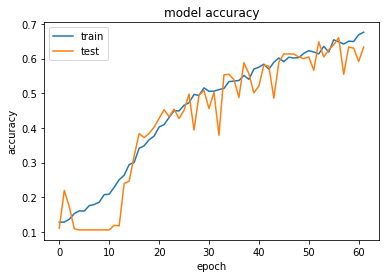

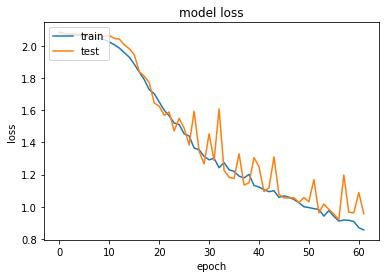

In [144]:
# Summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model accuracy.png')
plt.show()
# Summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model loss.png')
plt.show()

In [145]:
# List with label names
rev_labels = []

for i, k in enumerate(labels.keys()):
    rev_labels.append(k)

rev_labels

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [146]:
# Exporting the model
model.save('model_v5.h5')

In [147]:
# Exporting training history
import pickle

with open('history.pkcl', 'wb') as f:
    pickle.dump(hist.history, f)